# pandas字符串操作
很明显除了数值型，我们处理的数据还有很多字符类型的，而这部分数据显然也非常重要，因此这个部分我们提一提pandas的字符串处理。

In [1]:
%matplotlib inline
%config ZMQInteractiveShell.ast_node_interactivity='all'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

/opt/anaconda3/envs/python27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


前面看到pandas在处理数值型的时候，各种如鱼得水，偷偷告诉你，pandas处理字符串也相当生猛。<br>
咱们来读一份天气数据。

In [2]:
weather_2012 = pd.read_csv('./data/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


# 5.1字符串操作

从上面的数据里面可以看到，有 'Weather' 这一列。我们这里假定包含 "Snow" 的才是下雪天。

pandas的str类型提供了一系列方便的函数，比如这里的contains，更多的例子可以查看 [这里](http://pandas.pydata.org/pandas-docs/stable/basics.html#vectorized-string-methods)。

In [3]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

你看我们contains返回的其实是布尔型的判定结果的dataframe。

In [4]:
# 返回bool型内容的dataframe
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

你以为懒癌晚期的我会一个个去看吗！！图样图森破！！我一个函数就给你画出来了！！！

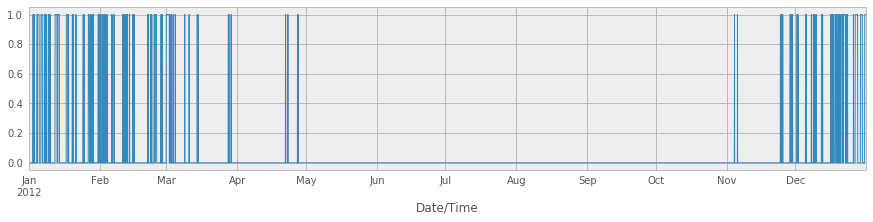

In [5]:
# 就是屌！！！
is_snowing.plot()

# 6.2 平均气温

如果我们想知道每个月的温度值中位数，有一个很有用的函数可以调用哈，叫 `resample()` 

/opt/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


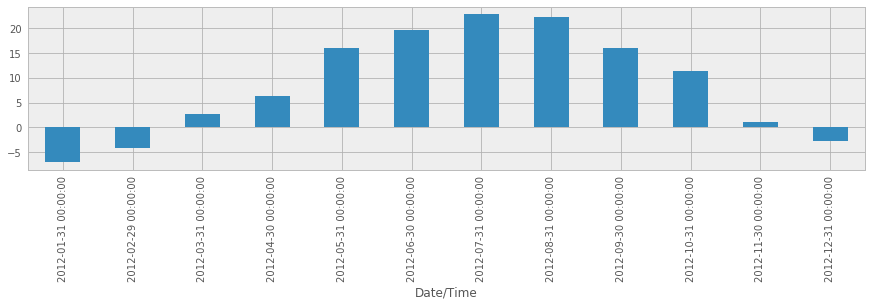

In [6]:
weather_2012['Temp (C)'].resample('M', how=np.median).plot(kind='bar')

符合预期对吧，7月和8月是温度最高的

你要知道，布尔型的 `True` 和 `False`其实是不便于运算的，当然，其实他们就是0和1了，所以我们转成float型去做做运算可好？

In [7]:
is_snowing.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
2012-01-01 05:00:00    0.0
2012-01-01 06:00:00    0.0
2012-01-01 07:00:00    0.0
2012-01-01 08:00:00    0.0
2012-01-01 09:00:00    0.0
Name: Weather, dtype: float64

然后我们很聪明地用 `resample` 去找到每个月下雪的比例状况（为嘛感觉在做很无聊的事情，其实哪个月下雪多我们知道的对么...）

In [8]:
is_snowing.astype(float).resample('M', how=np.mean)

/opt/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

/opt/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


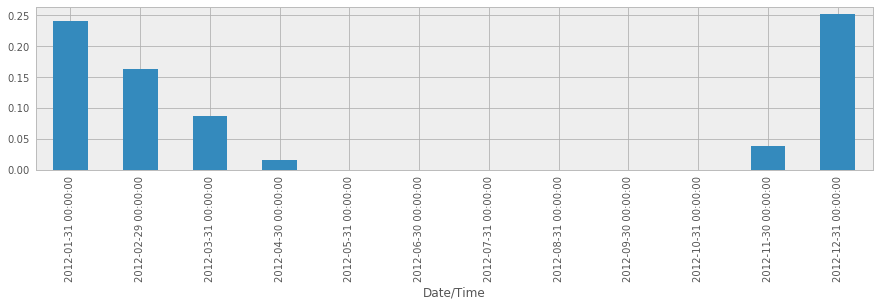

In [9]:
is_snowing.astype(float).resample('M', how=np.mean).plot(kind='bar')

So，你也看到了，加拿大的12月是下雪最多的月份。然后你还能观察到一些其他的端倪，比如你会发现，11月开始突然下雪，接着就雪期漫漫，虽然下雪的概率逐步减小，但是可能要到4月或者5月才会停止。

# 5.3 画一下温度和雪期

我们把温度和下雪概率放到一起，组成dataframe的2列，然后画个图

In [20]:
temperature = weather_2012['Temp (C)'].resample('M', how=np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M', how=np.mean)

# 给列取个名字
temperature.name = "Temperature"
snowiness.name = "Snowiness"

/opt/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until


### 我们用concat完成字符串的拼接

用 `concat` 把这两列拼接到一列中，组成一个新的dataframe

In [17]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


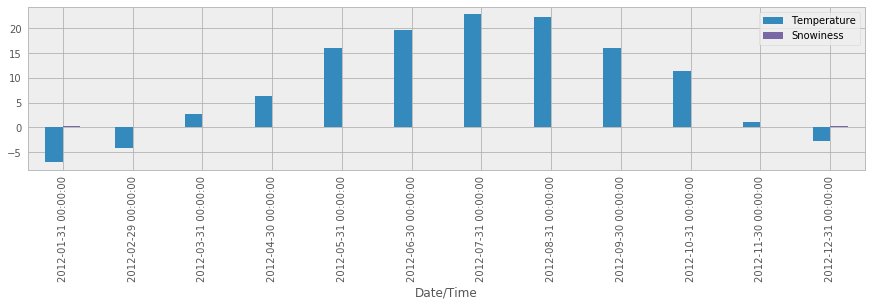

In [18]:
stats.plot(kind='bar')

你发现，什么鬼！！！紫色的下雪概率呢！！！<br>
是的亲，你这2个维度的幅度是不一样的，所以要分开画哦。

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119457350>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1194f2f90>], dtype=object)

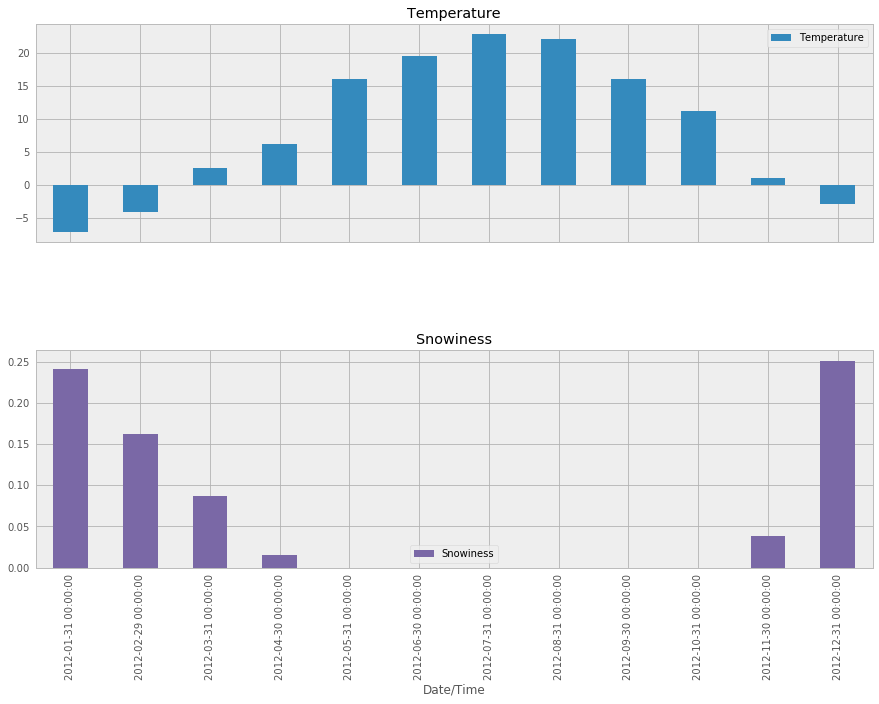

In [19]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))

# 总结

/opt/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:22: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/opt/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:24: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10bb8b8d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10b2e5890>], dtype=object)

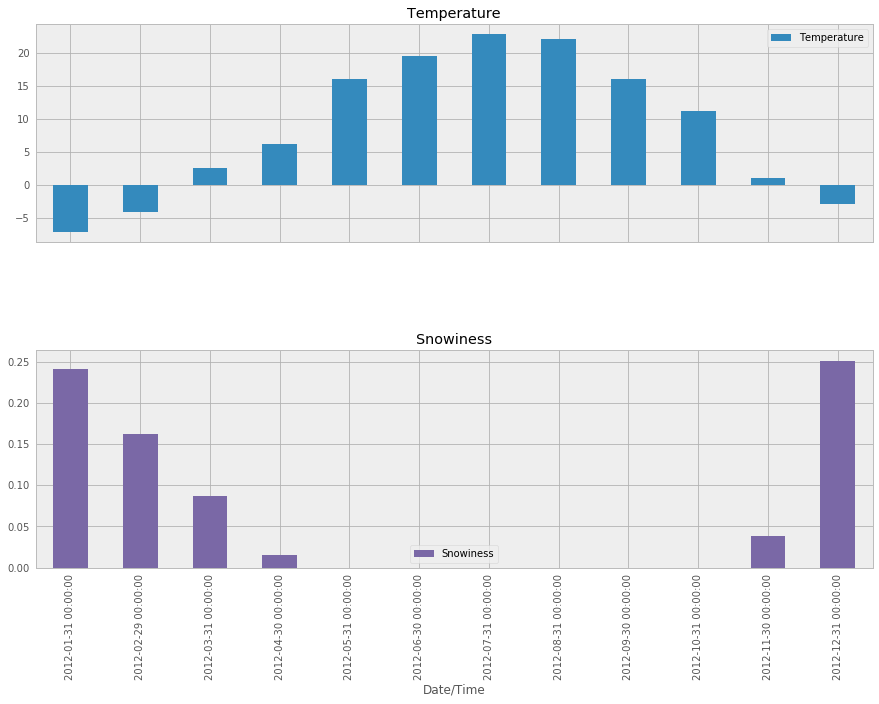

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
# matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

# Load data
weather_2012 = pd.read_csv('./data/weather_2012.csv',
                           parse_dates=True,
                           index_col='Date/Time')
# Data Preprocessing
temperature = weather_2012['Temp (C)'].resample('M', how=np.median) #采样频率 1个月，统计 中位数
is_snowing = weather_2012['Weather'].str.contains('Snow')           #统计 字符串 的值是否包含某个字段，
snowiness = is_snowing.astype(float).resample('M', how=np.mean)     #采样频率 1个月，统计 平均值
# Rename the Dataframe
temperature.name = "Temperature"
snowiness.name = "Snowiness"
# Concat all of the Dataframe
stats = pd.concat([temperature, snowiness], axis=1)
# Plot
stats.plot(kind='bar', subplots=True, figsize=(15, 10))